# BOOSTING  | Machine Learning II


---
## Import modules

In [3]:
import numpy as np # linear algebra
import pandas as pd  # data management (dataframes)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # plotting

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression 

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.inspection import permutation_importance

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, GradientBoostingRegressor


# others
from mltools import model_tools as MT

### Prepare and Explore the Data

In [2]:
# Load file with the dataset
df = pd.read_csv('data/dataset_final.csv', sep = ",")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,FECHA,UTIL,IRRAD,ANNO,DIA,DIASEM,MES,TRAMO
0,2015-01-01 00:00:00,0.000003,0.0,2015,1,3,1,0
1,2015-01-01 03:00:00,0.000006,0.0,2015,1,3,1,3
2,2015-01-01 06:00:00,0.067728,0.0,2015,1,3,1,6
3,2015-01-01 09:00:00,0.611120,760335.4,2015,1,3,1,9
4,2015-01-01 12:00:00,0.660956,1565422.5,2015,1,3,1,12


We do a short recap of the data and the features we have in the dataset. This would be complementary to the EDA done in the previous notebook.
<!-- Esto es complemento de lo que ya teniamos en el anterior notebook osea que se puede quitar-->

In [4]:
# Basic exploratory analysis
print('\nInfo variables:')
print(df.describe())


Info variables:
               UTIL         IRRAD          ANNO           DIA        DIASEM  \
count  17536.000000  1.753600e+04  17536.000000  17536.000000  17536.000000   
mean       0.191807  6.249594e+05   2017.500456     15.732664      3.000000   
std        0.243801  8.733386e+05      1.708230      8.801621      1.999601   
min       -0.000183  0.000000e+00   2015.000000      1.000000      0.000000   
25%        0.000025  0.000000e+00   2016.000000      8.000000      1.000000   
50%        0.031350  0.000000e+00   2017.500000     16.000000      3.000000   
75%        0.354966  1.229791e+06   2019.000000     23.000000      5.000000   
max        0.830403  3.042620e+06   2020.000000     31.000000      6.000000   

                MES        TRAMO  
count  17536.000000  17536.00000  
mean       6.521898     10.50000  
std        3.449085      6.87406  
min        1.000000      0.00000  
25%        4.000000      5.25000  
50%        7.000000     10.50000  
75%       10.000000     15

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FECHA   17536 non-null  object 
 1   UTIL    17536 non-null  float64
 2   IRRAD   17536 non-null  float64
 3   ANNO    17536 non-null  int64  
 4   DIA     17536 non-null  int64  
 5   DIASEM  17536 non-null  int64  
 6   MES     17536 non-null  int64  
 7   TRAMO   17536 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


In [6]:
df[['ANNO', 'DIA', 'DIASEM', 'MES', 'TRAMO']] = df[['ANNO', 'DIA', 'DIASEM', 'MES', 'TRAMO']].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   FECHA   17536 non-null  object  
 1   UTIL    17536 non-null  float64 
 2   IRRAD   17536 non-null  float64 
 3   ANNO    17536 non-null  category
 4   DIA     17536 non-null  category
 5   DIASEM  17536 non-null  category
 6   MES     17536 non-null  category
 7   TRAMO   17536 non-null  category
dtypes: category(5), float64(2), object(1)
memory usage: 499.3+ KB


Finally, in order to build the models, we split the data into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [8]:
# Define input and output matrices
INPUTS = ['FECHA','IRRAD','ANNO', 'DIA', 'DIASEM', 'MES', 'TRAMO']
OUTPUT = 'UTIL'
X = df[INPUTS]
y = df[OUTPUT]

# Normalmente en series temporales tendriamos que hacer una division secuencial
# sin embargo, como aqui tenemos variables que categorizan el dia, mes y año no es necesario
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  #percentage of test data
                                                    random_state=0) #seed for replication

---
## 1. Regression problem

### 1.4 Fit AdaBoost - Single Decision Tree

In [15]:
n_estimators=5000
INPUTS_AB = ['IRRAD','ANNO', 'DIA', 'DIASEM', 'MES', 'TRAMO']
max_depth = 4
min_impurity_decrease =  0.001 
AdaBoost_reg_tree_fit = AdaBoostRegressor(
                                DecisionTreeRegressor(max_depth=max_depth,
                                                      min_impurity_decrease=min_impurity_decrease), 
                                n_estimators=n_estimators,

                                random_state=999)

AdaBoost_reg_tree_fit.fit(X[INPUTS_AB], y)
AdaBoost_reg_tree_fit.get_params()

{'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': 4,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.001,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(max_depth=4, min_impurity_decrease=0.001),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 5000,
 'random_state': 999}

Compute residuals AdaBoost and plot residuals

In [17]:
##  Compute errors
y_train_est =  AdaBoost_reg_tree_fit.predict(X_train[INPUTS_AB])
y_test_est =  AdaBoost_reg_tree_fit.predict(X_test[INPUTS_AB])

mse_tr = np.mean((y_train - y_train_est)**2)
mse_ts = np.mean((y_test - y_test_est)**2)

mae_tr = np.mean(np.abs(y_train - y_train_est))
mae_ts = np.mean(np.abs(y_test - y_test_est))

r2_tr = metrics.r2_score(y_train, y_train_est)
r2_ts = metrics.r2_score(y_test, y_test_est)

print(f'MSE(TR) = {mse_tr}')
print(f'MSE(TS) = {mse_ts}')

print(f'MAE(TR) = {mae_tr}')
print(f'MAE(TS) = {mae_ts}')

print(f'R2(TR) = {r2_tr}')
print(f'R2(TS) = {r2_ts}')

MSE(TR) = 0.010540479328158808
MSE(TS) = 0.01072295761734678
MAE(TR) = 0.09414992686534412
MAE(TS) = 0.09513018685648778
R2(TR) = 0.8221084034487078
R2(TS) = 0.8217852298788024


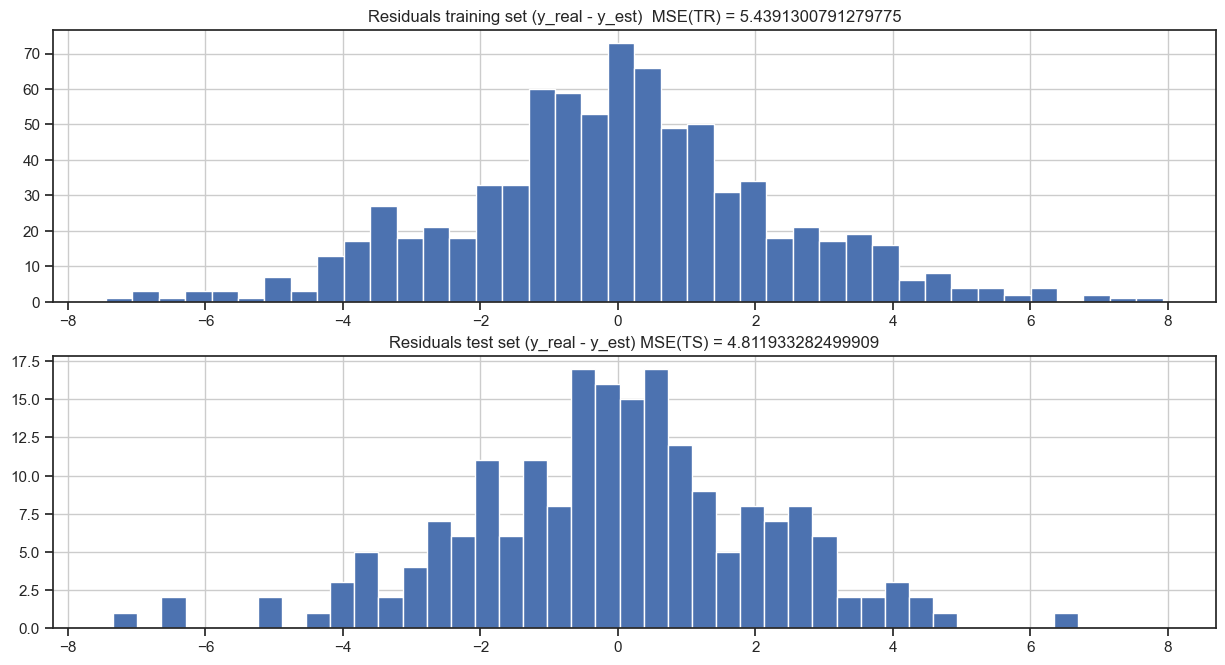

In [52]:
# Plot histogram of residuals
plt.figure(figsize=(15, 12))


ax=plt.subplot(3,1,2)
plt.hist(y_train - y_train_est, bins = 40, label='Residuals training set')
plt.grid()
plt.title(f'Residuals training set (y_real - y_est)  MSE(TR) = {mse_tr}')

plt.subplot(3,1,3, sharex = ax)
plt.hist(y_test - y_test_est, bins = 40, label='Residuals training set')
plt.grid()
plt.title(f'Residuals test set (y_real - y_est) MSE(TS) = {mse_ts}')
plt.show()

In [19]:
n_estimators=50
INPUTS_AB = ['IRRAD','ANNO', 'DIA', 'DIASEM', 'MES', 'TRAMO']
max_depth = 4
min_impurity_decrease =  0.001 
AdaBoost_reg_tree_fit = AdaBoostRegressor(
                                RandomForestRegressor(n_estimators=n_estimators,
                                        max_features='sqrt',
                                        criterion='squared_error',  # impurity measure
                                        min_samples_split=2, # Minimum number of obs in node to keep cutting
                                        min_samples_leaf=1, # Minimum number of obs in a terminal node  
                                        random_state=0), 
                                n_estimators=n_estimators,

                                random_state=999)

AdaBoost_reg_tree_fit.fit(X[INPUTS_AB], y)
AdaBoost_reg_tree_fit.get_params()

{'base_estimator': 'deprecated',
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 50,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(max_features='sqrt', n_estimators=50, random_state=0),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 999}

In [20]:
##  Compute errors
y_train_est =  AdaBoost_reg_tree_fit.predict(X_train[INPUTS_AB])
y_test_est =  AdaBoost_reg_tree_fit.predict(X_test[INPUTS_AB])

mse_tr = np.mean((y_train - y_train_est)**2)
mse_ts = np.mean((y_test - y_test_est)**2)

mae_tr = np.mean(np.abs(y_train - y_train_est))
mae_ts = np.mean(np.abs(y_test - y_test_est))

r2_tr = metrics.r2_score(y_train, y_train_est)
r2_ts = metrics.r2_score(y_test, y_test_est)

print(f'MSE(TR) = {mse_tr}')
print(f'MSE(TS) = {mse_ts}')

print(f'MAE(TR) = {mae_tr}')
print(f'MAE(TS) = {mae_ts}')

print(f'R2(TR) = {r2_tr}')
print(f'R2(TS) = {r2_ts}')

MSE(TR) = 2.0497841086627487e-05
MSE(TS) = 1.998584148076244e-05
MAE(TR) = 0.003968532026077226
MAE(TS) = 0.0039275594447992475
R2(TR) = 0.9996540580780787
R2(TS) = 0.9996678367785945


In [21]:
n_estimators=50
INPUTS_AB = ['IRRAD','ANNO', 'DIA', 'DIASEM', 'MES', 'TRAMO']
max_depth = 4
min_impurity_decrease =  0.001 
AdaBoost_reg_tree_fit = AdaBoostRegressor(
                                RandomForestRegressor(n_estimators=145,
                                        max_features=5,
                                        criterion='squared_error',  # impurity measure
                                        min_samples_split=2, # Minimum number of obs in node to keep cutting
                                        min_samples_leaf=1, # Minimum number of obs in a terminal node  
                                        random_state=0), 
                                n_estimators=n_estimators,

                                random_state=999)

AdaBoost_reg_tree_fit.fit(X[INPUTS_AB], y)
AdaBoost_reg_tree_fit.get_params()

{'base_estimator': 'deprecated',
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 5,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 145,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(max_features=5, n_estimators=145, random_state=0),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 999}

In [22]:
##  Compute errors
y_train_est =  AdaBoost_reg_tree_fit.predict(X_train[INPUTS_AB])
y_test_est =  AdaBoost_reg_tree_fit.predict(X_test[INPUTS_AB])

mse_tr = np.mean((y_train - y_train_est)**2)
mse_ts = np.mean((y_test - y_test_est)**2)

mae_tr = np.mean(np.abs(y_train - y_train_est))
mae_ts = np.mean(np.abs(y_test - y_test_est))

r2_tr = metrics.r2_score(y_train, y_train_est)
r2_ts = metrics.r2_score(y_test, y_test_est)

print(f'MSE(TR) = {mse_tr}')
print(f'MSE(TS) = {mse_ts}')

print(f'MAE(TR) = {mae_tr}')
print(f'MAE(TS) = {mae_ts}')

print(f'R2(TR) = {r2_tr}')
print(f'R2(TS) = {r2_ts}')

MSE(TR) = 1.1638729831414571e-05
MSE(TS) = 1.124982366882002e-05
MAE(TR) = 0.0024928545071125695
MAE(TS) = 0.0024473749707090526
R2(TR) = 0.9998035732373187
R2(TS) = 0.9998130287546974


### 1.5 Gradient boosting 

In [53]:
number_estimators = 5000
learning_rate = 1.0
max_depth = 1
min_impurity_decrease =  0.001 * np.var(y_train)

GB_reg_estim = GradientBoostingRegressor(n_estimators=number_estimators,
                                            learning_rate = learning_rate,
                                            max_depth = max_depth,
                                            max_features = 1.0, # 'auto', ‘sqrt’, ‘log2’, int or float, default=None
                                            loss = 'squared_error',  
                                            min_impurity_decrease = min_impurity_decrease,  
                                            min_samples_split=2, # Minimum number of obs in node to keep cutting
                                            min_samples_leaf=1, # Minimum number of obs in a terminal node  
                                            random_state=0)

GB_reg_estim.fit(X.reshape(-1, 1), y)

# see all the params
GB_reg_estim.get_params() 

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'squared_error',
 'max_depth': 1,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.018363972361370284,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5000,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

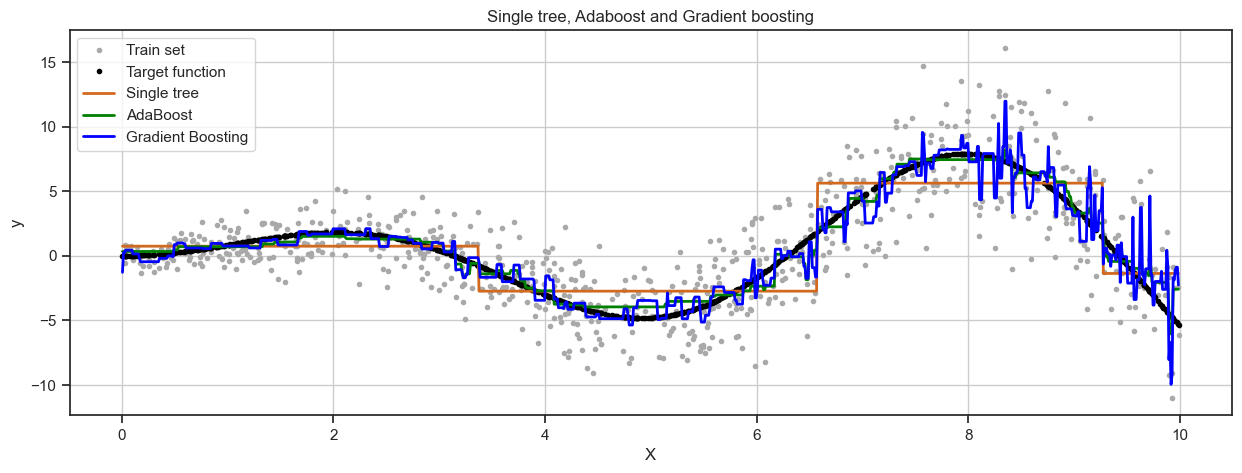

In [54]:
## Plot
plt.figure(figsize=(15, 5))

# Predict
Xs = np.arange(np.min(X), np.max(X), 0.01).reshape(-1,1)
y_est_GB = GB_reg_estim.predict(Xs)

# Plot
plt.plot(X_train,y_train,'.',color='darkgray', label='Train set')
plt.plot(X, y_true, '.', color = 'black', label='Target function')
plt.plot(Xs, y_est, color = 'chocolate', linewidth= 2, label='Single tree')
plt.plot(Xs, y_est_adaboost, color = 'green', linewidth= 2, label='AdaBoost')
plt.plot(Xs, y_est_GB, color = 'blue', linewidth= 2, label='Gradient Boosting')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Single tree, Adaboost and Gradient boosting')
plt.grid()
plt.show()

MSE(TR) = 3.2963753394166564
MSE(TS) = 3.2763326738500744
MAE(TR) = 1.3768048153224313
MAE(TS) = 1.3314568244748377


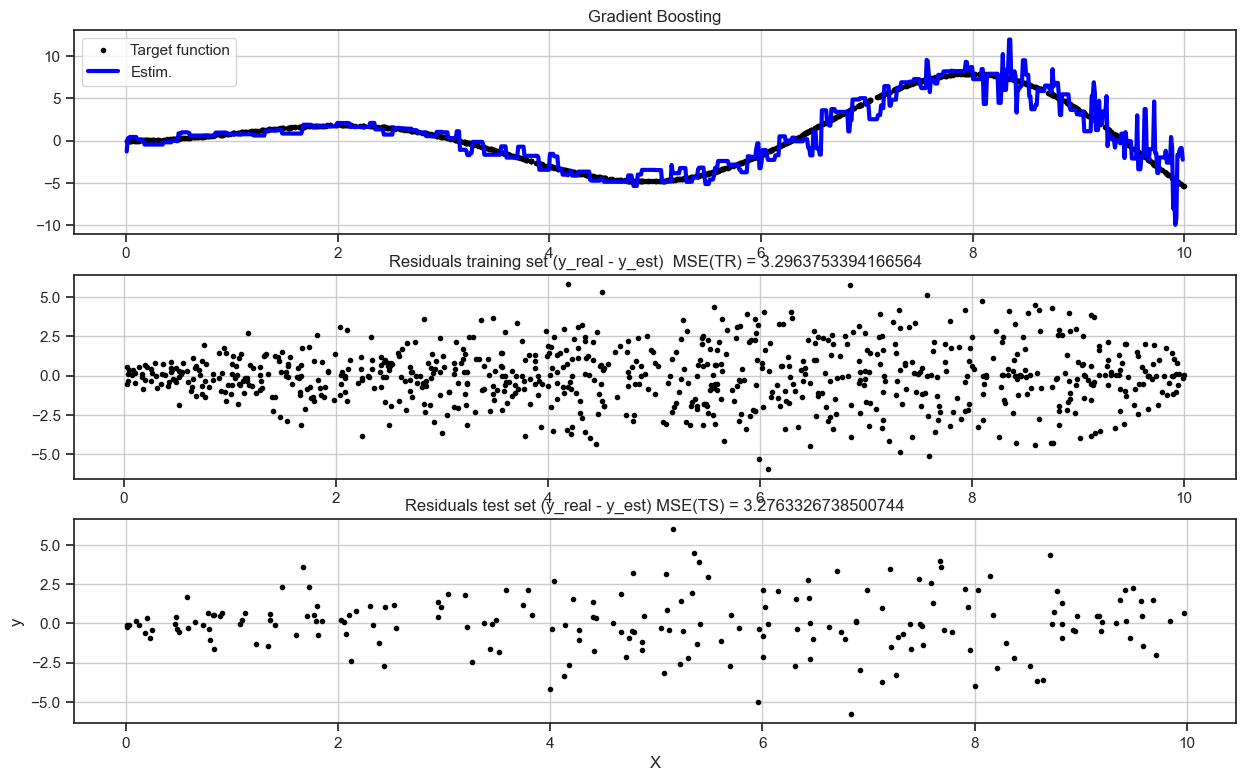

In [55]:
##  Compute errors
y_train_est =  GB_reg_estim.predict(X_train.reshape(-1, 1))
y_test_est =  GB_reg_estim.predict(X_test.reshape(-1, 1))

mse_tr = np.mean((y_train - y_train_est)**2)
mse_ts = np.mean((y_test - y_test_est)**2)

mae_tr = np.mean(np.abs(y_train - y_train_est))
mae_ts = np.mean(np.abs(y_test - y_test_est))

print(f'MSE(TR) = {mse_tr}')
print(f'MSE(TS) = {mse_ts}')

print(f'MAE(TR) = {mae_tr}')
print(f'MAE(TS) = {mae_ts}')

# Plot
plt.figure(figsize=(15, 9))

plt.subplot(3,1,1)
plt.plot(X, y_true, '.', color = 'black', label='Target function')
plt.plot(Xs, y_est_GB, color = 'blue', linewidth= 3, label='Estim.')
plt.grid()
plt.legend()
plt.title(f'Gradient Boosting')

plt.subplot(3,1,2)
plt.plot(X_train, y_train - y_train_est, '.', color = 'black')
plt.grid()
plt.title(f'Residuals training set (y_real - y_est)  MSE(TR) = {mse_tr}')

plt.subplot(3,1,3)
plt.plot(X_test, y_test - y_test_est, '.', color = 'black')
plt.title(f'Residuals test set (y_real - y_est) MSE(TS) = {mse_ts}')
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

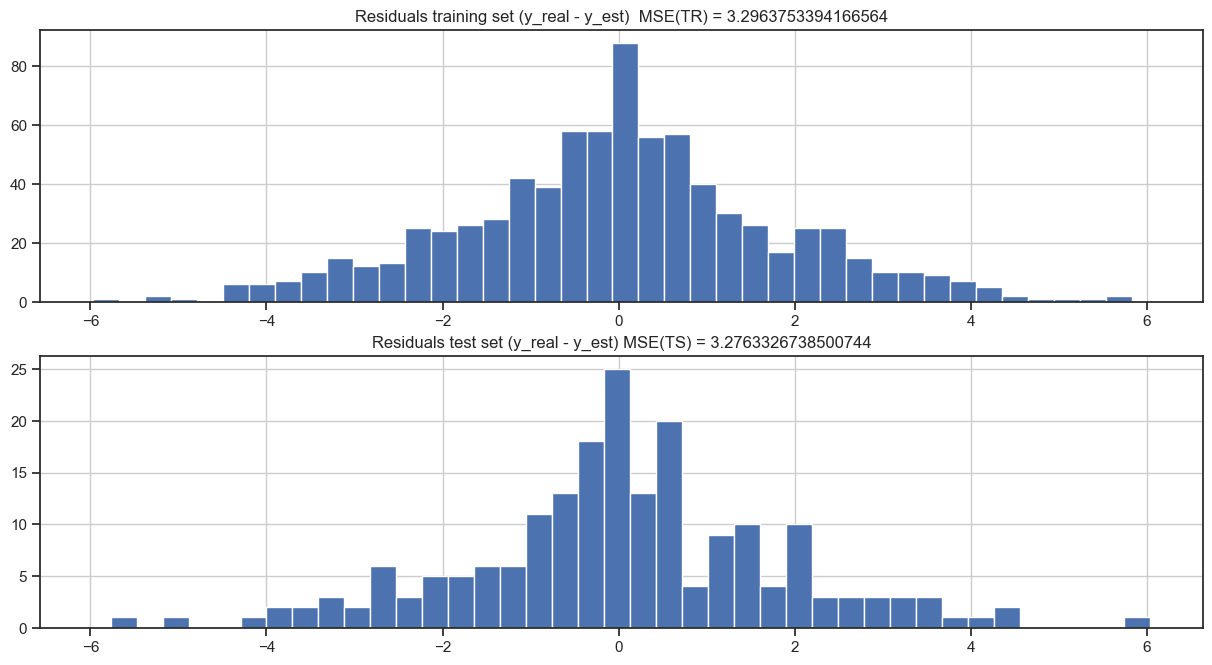

In [56]:
# Plot histogram of residuals
plt.figure(figsize=(15, 12))


ax=plt.subplot(3,1,2)
plt.hist(y_train - y_train_est, bins = 40, label='Residuals training set')
plt.grid()
plt.title(f'Residuals training set (y_real - y_est)  MSE(TR) = {mse_tr}')

plt.subplot(3,1,3, sharex = ax)
plt.hist(y_test - y_test_est, bins = 40, label='Residuals training set')
plt.grid()
plt.title(f'Residuals test set (y_real - y_est) MSE(TS) = {mse_ts}')
plt.show()

---
## 1. Classification problem

#### 2.1 Load the dataset

In [19]:
# Load file with the dataset
df = pd.read_csv('simDataTriangle.dat', sep = "\t")
print('Dataframe:')
print(df.head())

# Convert output variable to categorical
df.Y = df.Y.astype('category')

Dataframe:
         X1        X2        X3        X4        X5        X6    Y
0 -0.416315  5.704369 -0.520502  5.624744 -0.567509  5.657103  OUT
1 -0.052473  9.467372 -0.308278  9.518659 -0.028233  9.271118  OUT
2 -0.552123  7.329100 -0.563368  7.373105 -0.851291  7.175183  OUT
3  0.290578  7.804284  0.248642  7.461996 -0.038654  7.557059  INS
4  0.116236  7.472282  0.154657  7.231131  0.154816  7.462239  INS


#### 2.2 Exploratory analysis


Info variables:
               X1          X2          X3          X4          X5          X6
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000
mean     0.484328    6.115594    0.488827    6.124073    0.487352    6.121143
std      0.606122    2.678621    0.633653    2.686707    0.632867    2.687277
min     -0.597901    0.010610   -0.906872   -0.182318   -0.973871   -0.090703
25%     -0.045126    4.507014   -0.009401    4.432009   -0.004716    4.415462
50%      0.475767    6.614707    0.508919    6.619594    0.479645    6.572260
75%      1.023133    8.265262    0.998416    8.306398    0.990994    8.278550
max      1.499564    9.976869    1.982567   10.558648    1.924748   10.294785


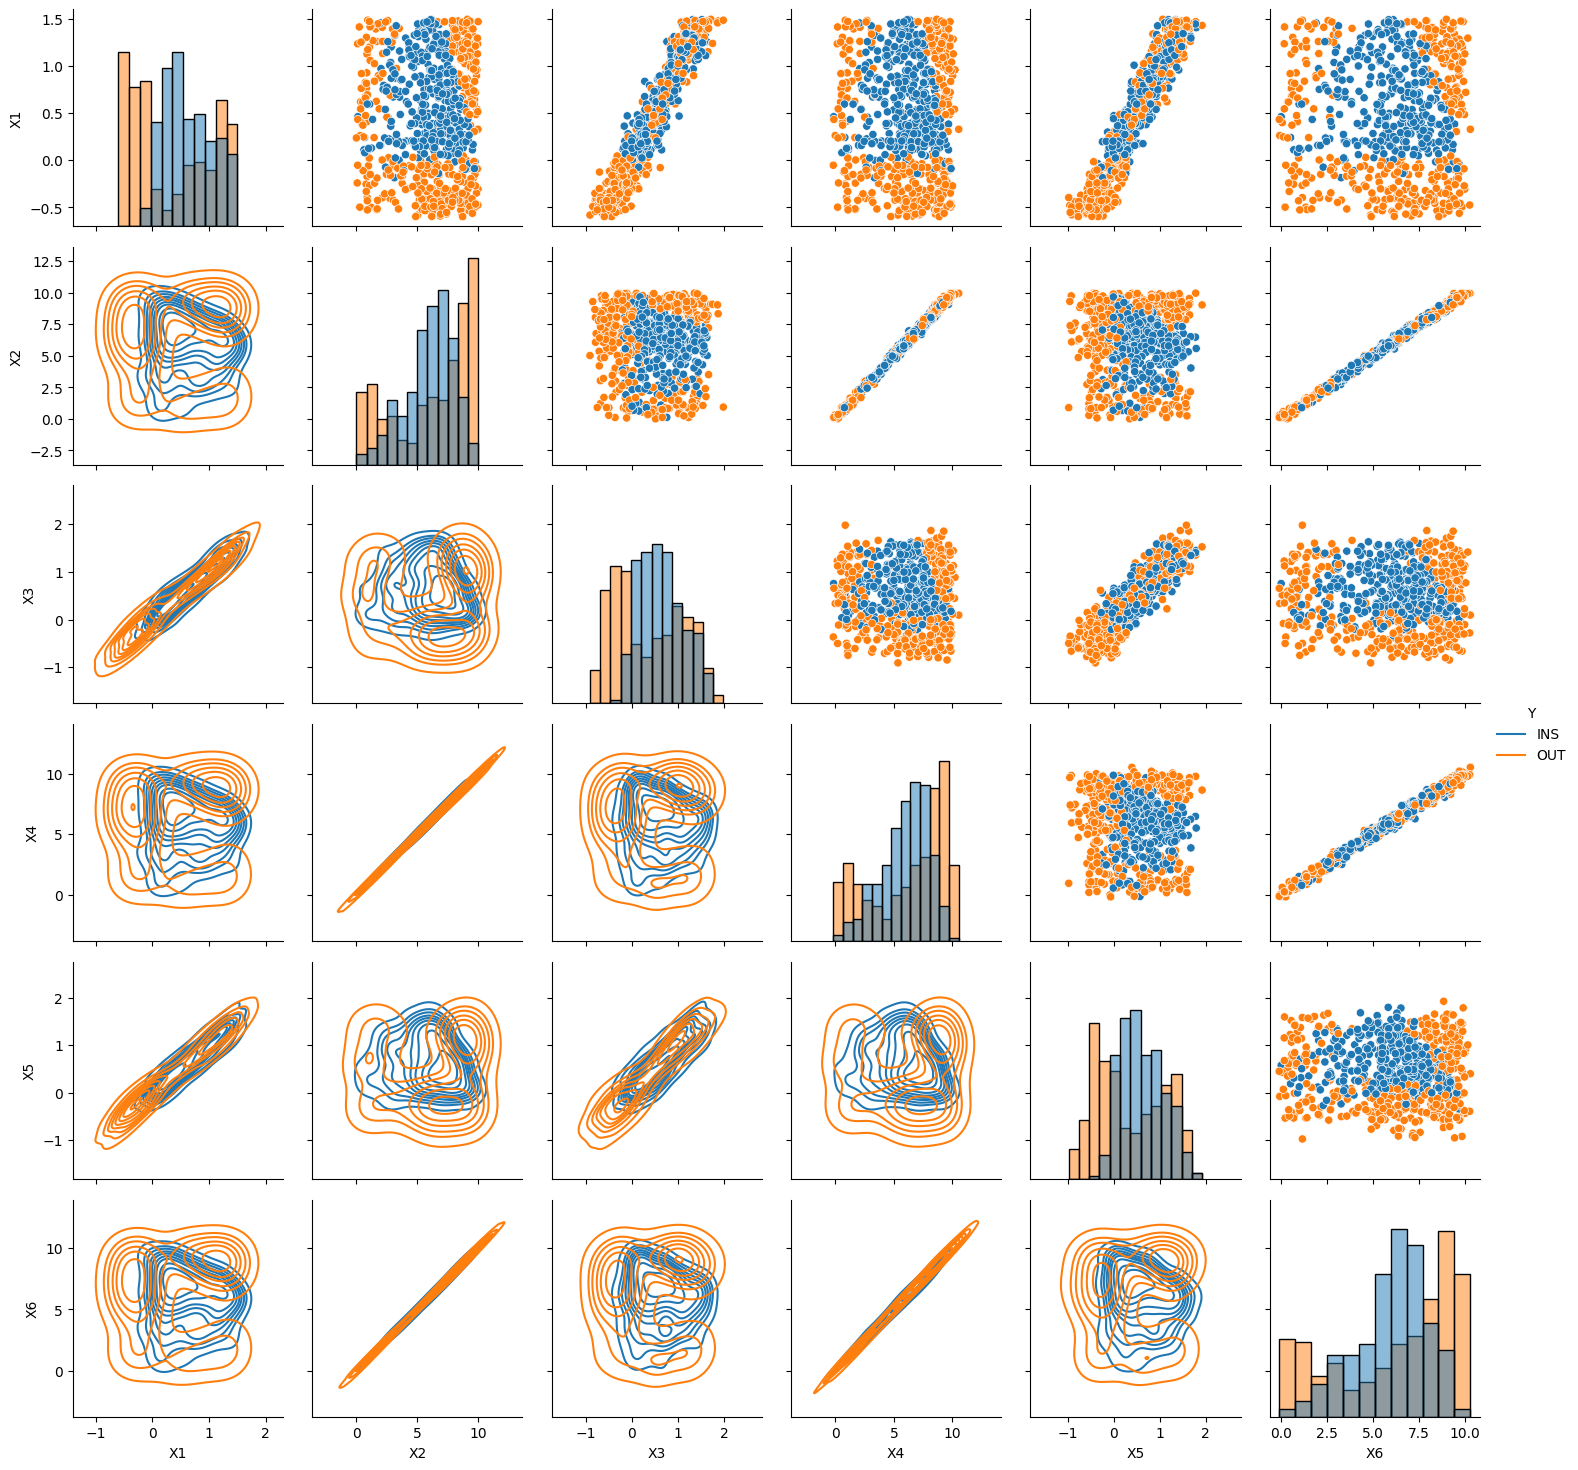

In [20]:
# Basic exploratory analysis

print('\nInfo variables:')
print(df.describe())

g = sns.PairGrid(df, hue="Y")
g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()

#### 2.3 Split the dataset in TR and TS

In [21]:
# Define input and output matrices
INPUTS = ['X1','X2','X3','X4','X5','X6']
OUTPUT = 'Y'
X = df[INPUTS]
y = df[OUTPUT]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  #percentage of test data
                                                    random_state=0, #seed for replication
                                                    stratify = y)   #Preserves distribution of y

### 2.4 Fit **single classification tree** (for comparison)

In [22]:
## Inputs of the model
INPUTS_DT = INPUTS

# grid in min_impurity x min_samples_leaf x min_samples_split
param = {'DT__min_impurity_decrease': np.arange(0,0.05,0.005), # Minimum entropy to decrease in each split
         'DT__min_samples_leaf': np.arange(1,10,1), # Minimum number of obs in a terminal node
         'DT__min_samples_split':  np.arange(1,10,1)} # Minimum number of obs in node to keep cutting

# param = {'DT__min_impurity_decrease': np.arange(0,0.05,0.005)} # Minimum entropy to decrease in each split

pipe = Pipeline(steps=[('DT', DecisionTreeClassifier(criterion='gini',  # impurity measure
                                                     random_state=150))]) # For replication
                                                     
# We use Grid Search Cross Validation to find the best parameter for the model in the grid defined 
nFolds = 10
tree_fit = GridSearchCV(estimator=pipe, # Structure of the model to use
                       param_grid=param, # Defined grid to search in
                       n_jobs=-1, # Number of cores to use (parallelize)
                       scoring='accuracy', # Accuracy https://scikit-learn.org/stable/modules/model_evaluation.html
                       cv=nFolds) # Number of Folds 
tree_fit.fit(X_train[INPUTS_DT], y_train) # Search in grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('DT',
                                        DecisionTreeClassifier(random_state=150))]),
             n_jobs=-1,
             param_grid={'DT__min_impurity_decrease': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045]),
                         'DT__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'DT__min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [23]:
# Show the best grid parameter combination found by CV
tree_fit.best_estimator_['DT'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 150,
 'splitter': 'best'}

##### 2.4.1 Plot the single classification tree

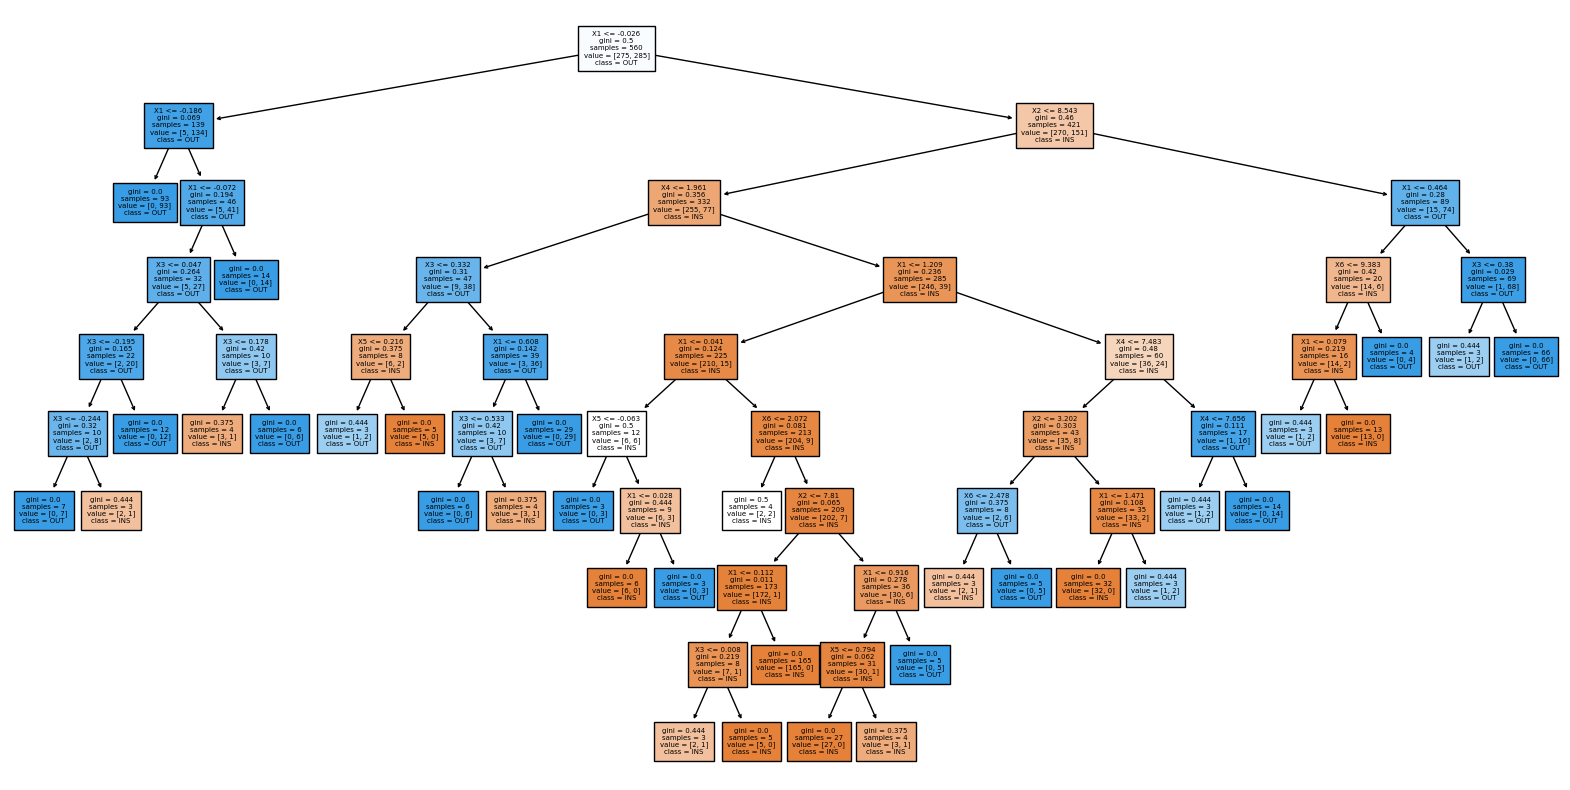

In [24]:
## Plot the decision tree model (use figsize and fontsize for getting the best view)
plt.figure(figsize=(20, 10))
plot_tree(tree_fit.best_estimator_['DT'],
          feature_names= INPUTS_DT,
          class_names= [str(s) for s in y_train.unique()],
          fontsize=5, filled=True)
plt.show()

In [25]:
# Easy reading of the tree
print(export_text(tree_fit.best_estimator_['DT'], feature_names= INPUTS_DT))

|--- X1 <= -0.03
|   |--- X1 <= -0.19
|   |   |--- class: OUT
|   |--- X1 >  -0.19
|   |   |--- X1 <= -0.07
|   |   |   |--- X3 <= 0.05
|   |   |   |   |--- X3 <= -0.20
|   |   |   |   |   |--- X3 <= -0.24
|   |   |   |   |   |   |--- class: OUT
|   |   |   |   |   |--- X3 >  -0.24
|   |   |   |   |   |   |--- class: INS
|   |   |   |   |--- X3 >  -0.20
|   |   |   |   |   |--- class: OUT
|   |   |   |--- X3 >  0.05
|   |   |   |   |--- X3 <= 0.18
|   |   |   |   |   |--- class: INS
|   |   |   |   |--- X3 >  0.18
|   |   |   |   |   |--- class: OUT
|   |   |--- X1 >  -0.07
|   |   |   |--- class: OUT
|--- X1 >  -0.03
|   |--- X2 <= 8.54
|   |   |--- X4 <= 1.96
|   |   |   |--- X3 <= 0.33
|   |   |   |   |--- X5 <= 0.22
|   |   |   |   |   |--- class: OUT
|   |   |   |   |--- X5 >  0.22
|   |   |   |   |   |--- class: INS
|   |   |   |--- X3 >  0.33
|   |   |   |   |--- X1 <= 0.61
|   |   |   |   |   |--- X3 <= 0.53
|   |   |   |   |   |   |--- class: OUT
|   |   |   |   |   |--- X3 > 

##### 2.4.2 Compute errors of the single classification tree

In [26]:
# model predictions in training (TR) and test (TS) sets
clf = tree_fit.best_estimator_['DT']
y_train_pred = clf.predict(X_train[INPUTS_DT]).tolist()
y_test_pred = clf.predict(X_test[INPUTS_DT]).tolist()

# main metrics
acc_tr = metrics.accuracy_score(y_train,y_train_pred)
acc_ts = metrics.accuracy_score(y_test,y_test_pred)

acc_bal_tr = metrics.balanced_accuracy_score(y_train,y_train_pred)
acc_bal_ts = metrics.balanced_accuracy_score(y_test,y_test_pred)

dfacc =  pd.DataFrame([[acc_tr, acc_ts], [acc_bal_tr, acc_bal_ts]], index= ['Accuracy', 'Balanced accuracy'],  columns=['TR', 'TS'])
print(dfacc)

print('\nMETRICS TRAINING:')
CT.confusion_matrix(y_train, y_train_pred, labels=['INS','OUT'])
print('\nMETRICS TEST SET:')
CT.confusion_matrix(y_test, y_test_pred, labels=['INS','OUT'])

                         TR        TS
Accuracy           0.976786  0.885714
Balanced accuracy  0.976874  0.885691

METRICS TRAINING:
Confusion Matrix and Statistics
	   Prediction
Reference  INS  OUT
      INS  270    5
      OUT    8  277

Accuracy: 0.98
No Information Rate: 0.5
P-Value [Acc > NIR]: 0.0
Kappa: 0.95
Mcnemar's Test P-Value: 0.58
Sensitivity: 0.97
Specificity: 0.98
Precision: 0.97
Recall: 0.98
Prevalence: 0.51
Detection Rate: 0.49
Detection prevalence: 0.5
Balanced accuracy: 0.98
F1 Score: 0.98
Positive label: INS

METRICS TEST SET:
Confusion Matrix and Statistics
	   Prediction
Reference  INS  OUT
      INS   61    8
      OUT    8   63

Accuracy: 0.89
No Information Rate: 0.5
P-Value [Acc > NIR]: 0.0
Kappa: 0.77
Mcnemar's Test P-Value: 1.0
Sensitivity: 0.89
Specificity: 0.88
Precision: 0.88
Recall: 0.88
Prevalence: 0.51
Detection Rate: 0.45
Detection prevalence: 0.51
Balanced accuracy: 0.89
F1 Score: 0.88
Positive label: INS


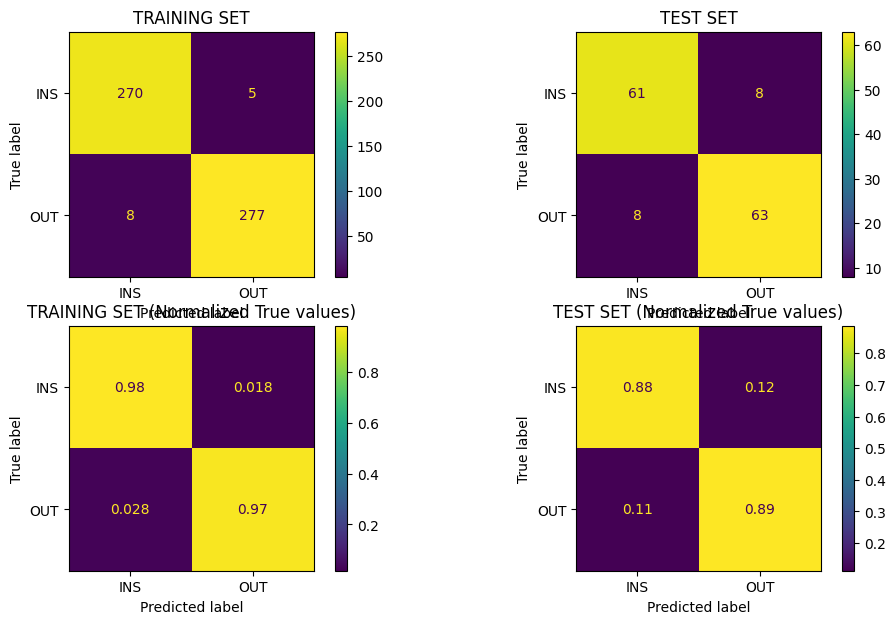

In [27]:
fig = plt.figure(figsize=(12, 7))

ax = plt.subplot(2,2,1)
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, ax = ax)
plt.title ('TRAINING SET')

ax = plt.subplot(2,2,2)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax = ax)
plt.title ('TEST SET')

ax = plt.subplot(2,2,3)
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, ax = ax, normalize = 'true')
plt.title ('TRAINING SET (Normalized True values)')

ax = plt.subplot(2,2,4)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax = ax, normalize = 'true')
plt.title ('TEST SET (Normalized True values)')

plt.show()

Confusion in TRAINING SET


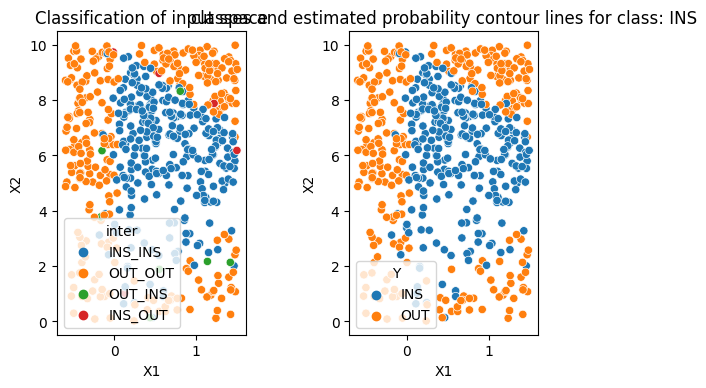

Confusion in TEST SET


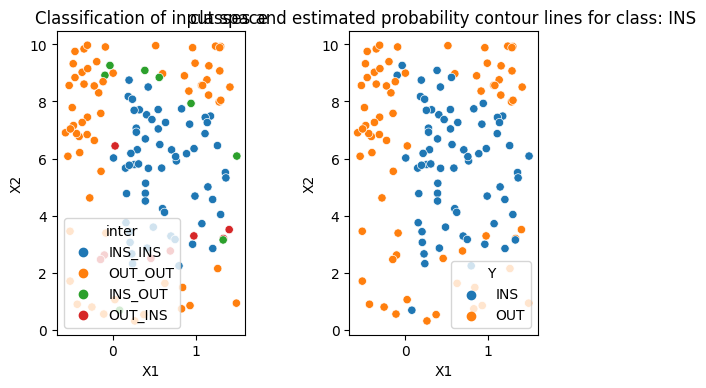

In [28]:
### Plot classification in a 2 dimensional space
print('Confusion in TRAINING SET')
CT.plot2DClass(X_train[INPUTS_DT], y_train, clf, 'X1', 'X2', 'INS', 50)
print('Confusion in TEST SET')
CT.plot2DClass(X_test[INPUTS_DT], y_test, clf, 'X1', 'X2', 'INS', 50) 

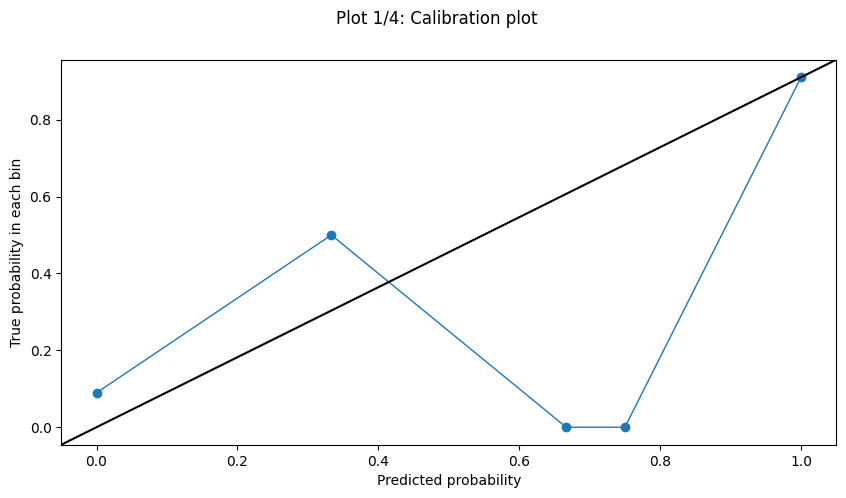

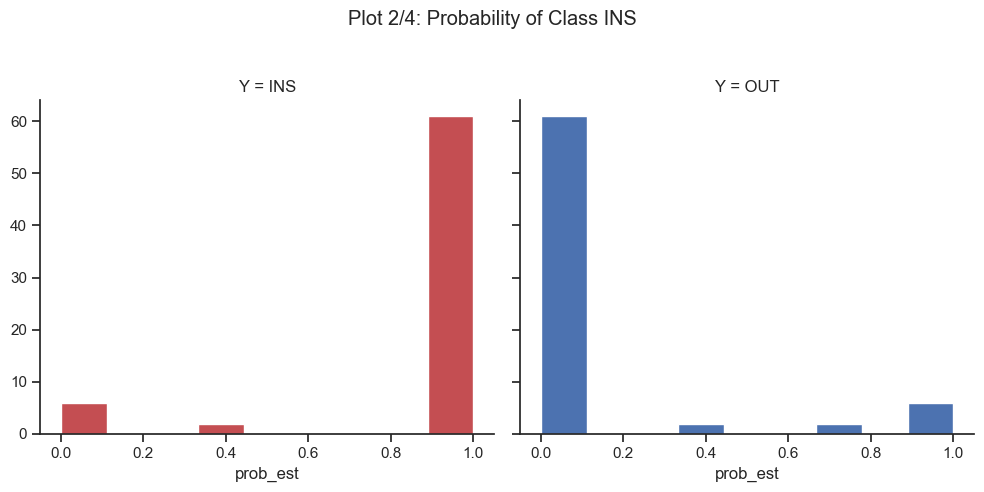

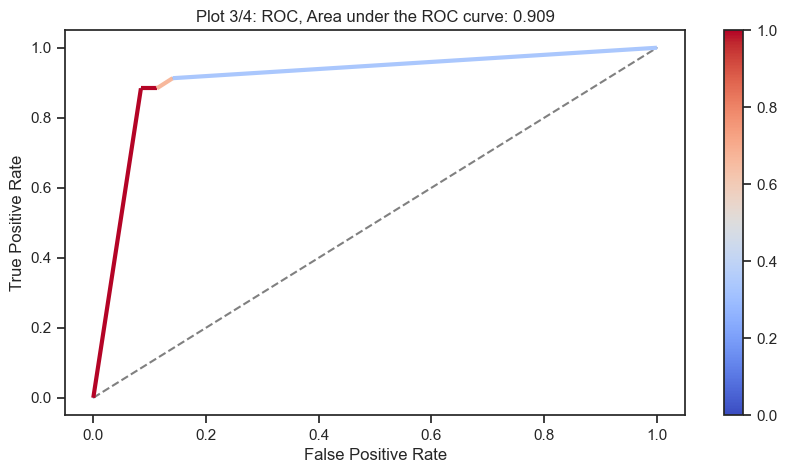

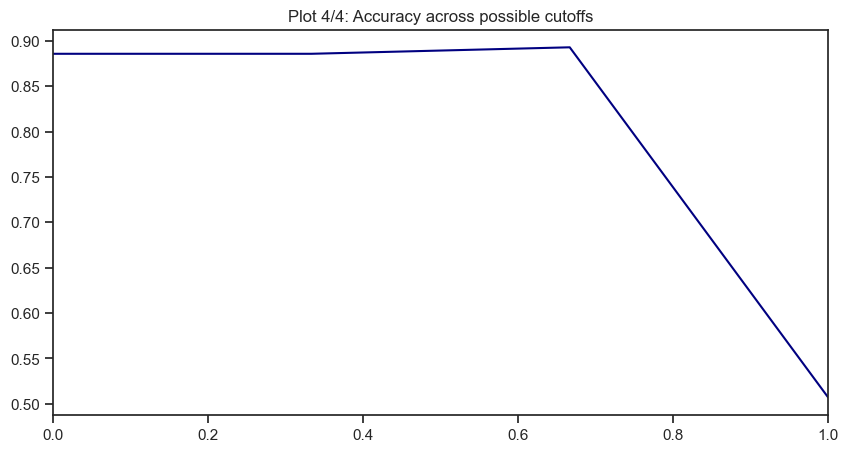

In [29]:
CT.plotClassPerformance(y_test, clf.predict_proba(X_test[INPUTS_DT]), selClass='INS')

##### 2.4.3 Importances of the inputs in the single tree

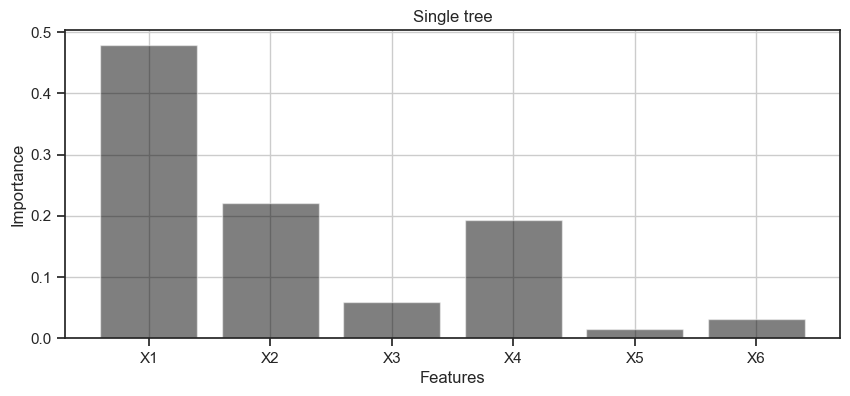

In [30]:
## Plot the variable importance of each feature
plt.figure(figsize=(10, 4))
bar_width = 0.35
plt.bar(INPUTS_DT, tree_fit.best_estimator_['DT'].feature_importances_, color='black', alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Single tree')
plt.grid()
plt.show()

### 2.5 Gradient Boosting

See **HistGradientBoostingClassifier**, inspired by **LightGBM**.

HistGradientBoostingClassifier is much faster than GradientBoostingClassifier for big datasets (n_samples >= 10 000).

**This estimator first bins the input samples X into integer-valued bins (typically 256 bins) which tremendously reduces the number of splitting points to consider, and allows the algorithm to leverage integer-based data structures (histograms) instead of relying on sorted continuous values when building the trees.**

##### 2.5.1 First straightforward version (without optim hyperparameters)

In [31]:
# The features are always randomly permuted at each split.

## loss{'log_loss', 'deviance', 'exponential'}, default='log_loss'
#  'log_loss' refers to binomial and multinomial deviance (as in logistic regression). It is a good choice for classification with probabilistic outputs. 
#  'exponential', gradient boosting recovers the AdaBoost algorithm.

## learning_rate float, default=0.1
#  Learning rate shrinks the contribution of each tree 
#  There is a trade-off between learning_rate and n_estimators.

In [32]:
number_estimators = 1000
learning_rate = 1.0
max_depth = 1

GB_class_estim = GradientBoostingClassifier(n_estimators=number_estimators,
                                            learning_rate = learning_rate,
                                            max_depth = max_depth,
                                            max_features = 1.0, # 'auto', ‘sqrt’, ‘log2’, int or float, default=None
                                            loss = 'log_loss',   # binomial and multinomial deviance
                                            min_samples_split=2, # Minimum number of obs in node to keep cutting
                                            min_samples_leaf=1, # Minimum number of obs in a terminal node  
                                            random_state=0)

# see all the params
GB_class_estim.get_params() 

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'log_loss',
 'max_depth': 1,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [33]:
# fit
INPUTS_BT = INPUTS                
GB_class_estim.fit(X_train[INPUTS_BT], y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, max_features=1.0,
                           n_estimators=1000, random_state=0)

In [34]:
# model predictions in training (TR) and test (TS) sets
clf = GB_class_estim
y_train_pred = clf.predict(X_train[INPUTS_DT]).tolist()
y_test_pred = clf.predict(X_test[INPUTS_DT]).tolist()

# main metrics
acc_tr = metrics.accuracy_score(y_train,y_train_pred)
acc_ts = metrics.accuracy_score(y_test,y_test_pred)

acc_bal_tr = metrics.balanced_accuracy_score(y_train,y_train_pred)
acc_bal_ts = metrics.balanced_accuracy_score(y_test,y_test_pred)

dfacc =  pd.DataFrame([[acc_tr, acc_ts], [acc_bal_tr, acc_bal_ts]], index= ['Accuracy', 'Balanced accuracy'],  columns=['TR', 'TS'])
print(dfacc)

print('\nMETRICS TRAINING:')
CT.confusion_matrix(y_train, y_train_pred, labels=['INS','OUT'])
print('\nMETRICS TEST SET:')
CT.confusion_matrix(y_test, y_test_pred, labels=['INS','OUT'])

                    TR        TS
Accuracy           1.0  0.892857
Balanced accuracy  1.0  0.892733

METRICS TRAINING:
Confusion Matrix and Statistics
	   Prediction
Reference  INS  OUT
      INS  275    0
      OUT    0  285

Accuracy: 1.0
No Information Rate: 0.5
P-Value [Acc > NIR]: 0.0
Kappa: 1.0
Mcnemar's Test P-Value: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 1.0
Prevalence: 0.51
Detection Rate: 0.51
Detection prevalence: 0.51
Balanced accuracy: 1.0
F1 Score: 1.0
Positive label: INS

METRICS TEST SET:
Confusion Matrix and Statistics
	   Prediction
Reference  INS  OUT
      INS   61    8
      OUT    7   64

Accuracy: 0.89
No Information Rate: 0.5
P-Value [Acc > NIR]: 0.0
Kappa: 0.79
Mcnemar's Test P-Value: 1.0
Sensitivity: 0.9
Specificity: 0.88
Precision: 0.9
Recall: 0.88
Prevalence: 0.51
Detection Rate: 0.46
Detection prevalence: 0.51
Balanced accuracy: 0.89
F1 Score: 0.89
Positive label: INS


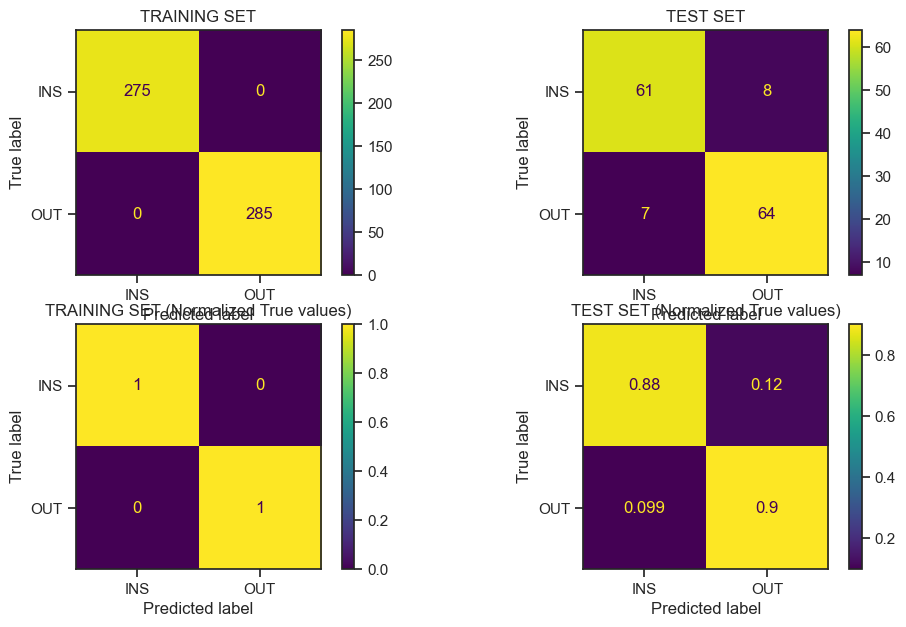

In [35]:
fig = plt.figure(figsize=(12, 7))

ax = plt.subplot(2,2,1)
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, ax = ax)
plt.title ('TRAINING SET')

ax = plt.subplot(2,2,2)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax = ax)
plt.title ('TEST SET')

ax = plt.subplot(2,2,3)
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, ax = ax, normalize = 'true')
plt.title ('TRAINING SET (Normalized True values)')

ax = plt.subplot(2,2,4)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax = ax, normalize = 'true')
plt.title ('TEST SET (Normalized True values)')

plt.show()

Confusion in TRAINING SET


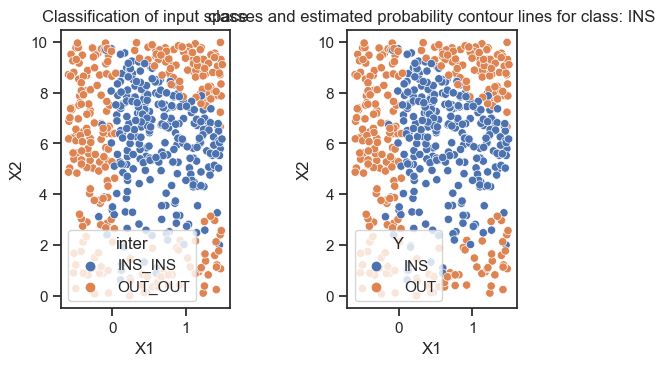

Confusion in TEST SET


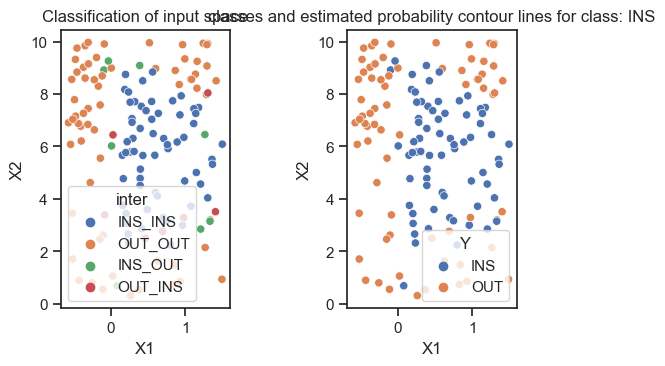

In [36]:
### Plot classification in a 2 dimensional space
print('Confusion in TRAINING SET')
CT.plot2DClass(X_train[INPUTS_DT], y_train, clf, 'X1', 'X2', 'INS', 50)
print('Confusion in TEST SET')
CT.plot2DClass(X_test[INPUTS_DT], y_test, clf, 'X1', 'X2', 'INS', 50) 

##### 2.5.2 Feature importance evaluation in gradient boosting using "Permutation Importance"

The permutation importance of a feature is calculated as follows:
- First, a baseline metric, defined by scoring, is evaluated on a (potentially different) dataset defined by the X. 
- Next, a feature column from the validation set is permuted and the metric is evaluated again. 
- The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column.

For further reading see L. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

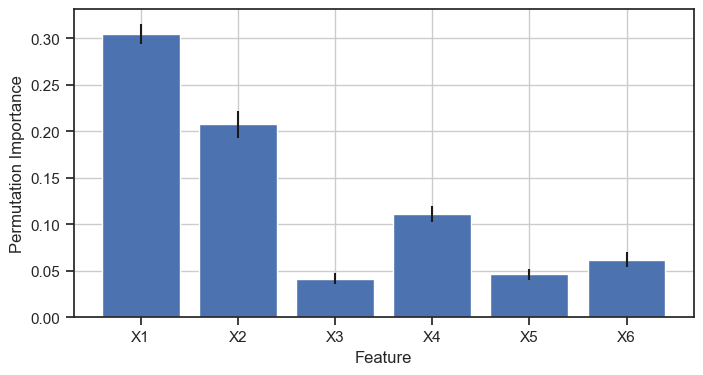

In [37]:
importances_bag_class_estim = permutation_importance(GB_class_estim, 
                                    X_train[INPUTS_DT], y_train,
                                    n_repeats=10,
                                    random_state=0)

fig = plt.figure(2, figsize=(8, 4)) 
plt.bar(INPUTS_DT, importances_bag_class_estim.importances_mean, yerr=importances_bag_class_estim.importances_std)
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.grid()
plt.show()